# Context
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]

# Content
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

Customers who left within the last month – the column is called Churn
Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
Demographic info about customers – gender, age range, and if they have partners and dependents
Inspiration
To explore this type of models and learn more about the subject.

In [3]:
import pandas as pd


In [2]:
from sklearn.utils import shuffle
data = shuffle(data)
train_data = data[:4000]
test_data = data[4000:]

In [3]:
train_data.to_csv('traindataset.csv',index=False)
test_data.to_csv('test.csv',index=False)
test_data.drop('Churn',axis=1,inplace=True)
test_data.to_csv('testdataset.csv',index=False)

C:\Users\SK074909\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [4]:
#importing datasets
df1 = pd.read_csv('traindataset.csv')
df2 = pd.read_csv('testdataset.csv')

In [5]:
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,8849-GYOKR,Female,0,Yes,No,54,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,No,Bank transfer (automatic),106.55,5763.3,Yes
1,7129-CAKJW,Female,0,No,No,17,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,No,Bank transfer (automatic),80.05,1345.65,No
2,0909-SELIE,Male,0,Yes,No,61,Yes,Yes,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),80.80,4860.85,No
3,3938-YFPXD,Male,0,No,No,72,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),84.30,5997.1,No
4,2027-OAQQC,Female,0,No,No,43,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),49.05,2076.2,Yes


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

C:\Users\Md Khalid Siddique\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [11]:
df1.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

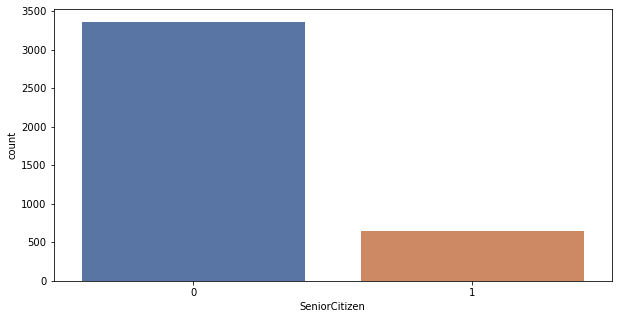

In [9]:
#Lets see how many of customers are in senior citizen quota
plt.rcParams['figure.figsize'] = (10, 5)
sns.countplot(df1['SeniorCitizen'], palette = 'deep')
plt.show()

1 = Senior citizen
2 = Not a senior citizen

--> As per the above plot, most of the customers are 'Not Senior Citizens'

* Now let me see if senior citizen are more likely to exit or not

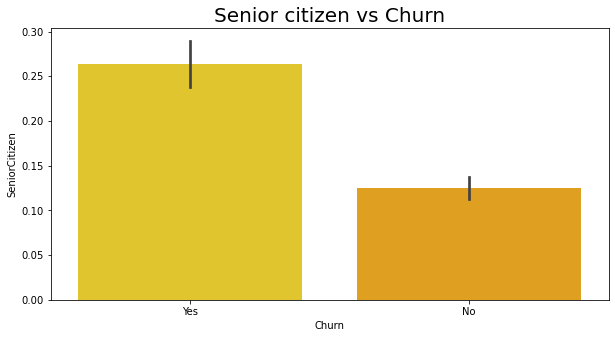

In [14]:
sns.barplot(df1['Churn'], df1['SeniorCitizen'], palette = 'Wistia')
plt.title('Senior citizen vs Churn', fontsize = 20)

plt.show()

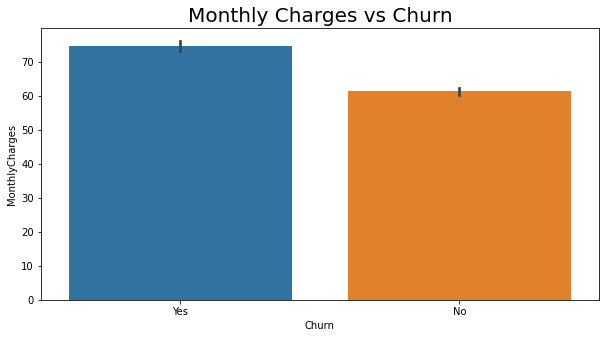

In [22]:
#Does Monthly charges affects churn
sns.barplot(df1['Churn'], df1['MonthlyCharges'])
plt.title('Monthly Charges vs Churn', fontsize = 20)

plt.show()

So here as per the above plot customer who are charged more, are likely to exit 

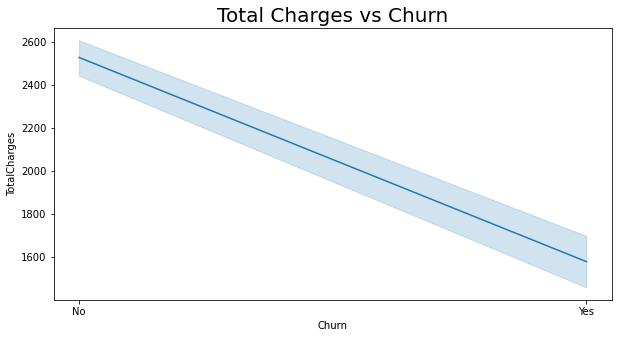

In [31]:
#Does Total charges affects churn
df1['TotalCharges']=pd.to_numeric(df1['TotalCharges'],errors='coerce')
df2['TotalCharges']=pd.to_numeric(df2['TotalCharges'],errors='coerce')

sns.lineplot(df1['Churn'], df1['TotalCharges'])
plt.title('Total Charges vs Churn', fontsize = 20)
plt.show()

Total charges is inversely related to customer churn i.e, large number of customer with high total charges are not exiting